In [2]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [4]:
df = pd.read_csv(r"C:\Users\saalf\OneDrive\المستندات\final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [132]:
df.shape

(10754, 22)

In [133]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [97]:
# only one dataset is used, consistency is not applied

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [98]:
# all columns are relevant 

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [99]:
# go to delete duplicates columns
df.duplicated().sum()

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [100]:
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [10]:
age = df[df['age']<= 18 ]
age

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
21,/kobbie-mainoo/profil/spieler/820374,Manchester United,Kobbie Mainoo,midfield-CentralMidfield,175.0,18.0,51,0.153759,0.102506,0.000000,...,0.0,0.0,3512,0,0,1,800000,800000,3,0
26,/alejandro-garnacho/profil/spieler/811779,Manchester United,Alejandro Garnacho,Attack-LeftWinger,180.0,18.0,72,0.525730,0.300417,0.225313,...,0.0,0.0,3595,50,11,2,25000000,25000000,4,1
178,/facundo-buonanotte/profil/spieler/983989,Brighton &amp; Hove Albion,Facundo Buonanotte,midfield-AttackingMidfield,174.0,18.0,14,0.142857,0.142857,0.285714,...,0.0,0.0,630,10,1,0,9000000,9000000,3,0
184,/evan-ferguson/profil/spieler/648046,Brighton &amp; Hove Albion,Evan Ferguson,Attack Centre-Forward,183.0,18.0,58,0.666477,0.153802,0.051267,...,0.0,0.0,3511,0,0,0,10000000,10000000,4,0
386,/stefan-bajcetic/profil/spieler/864799,Liverpool FC,Stefan Bajcetic,midfield-DefensiveMidfield,185.0,18.0,48,0.111352,0.055676,0.222703,...,0.0,0.0,3233,237,27,0,13000000,13000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,/panashe-madanha/profil/spieler/1038443,Adelaide United,Panashe Madanha,Defender Right-Back,183.0,18.0,13,0.000000,0.000000,0.000000,...,0.0,0.0,345,0,0,0,75000,75000,2,1
10714,/jonny-yull/profil/spieler/857060,Adelaide United,Jonny Yull,midfield-CentralMidfield,174.0,18.0,7,0.000000,0.000000,0.772532,...,0.0,0.0,233,31,3,0,150000,150000,3,0
10720,/nestory-irankunda/profil/spieler/956920,Adelaide United,Nestory Irankunda,Attack-RightWinger,175.0,17.0,35,0.924262,0.231065,1.039795,...,0.0,0.0,779,0,0,0,350000,350000,4,1
10725,/luka-jovanovic/profil/spieler/1038441,Adelaide United,Luka Jovanovic,Attack Centre-Forward,179.0,18.0,9,0.862620,0.000000,0.000000,...,0.0,0.0,313,0,0,0,75000,75000,4,0


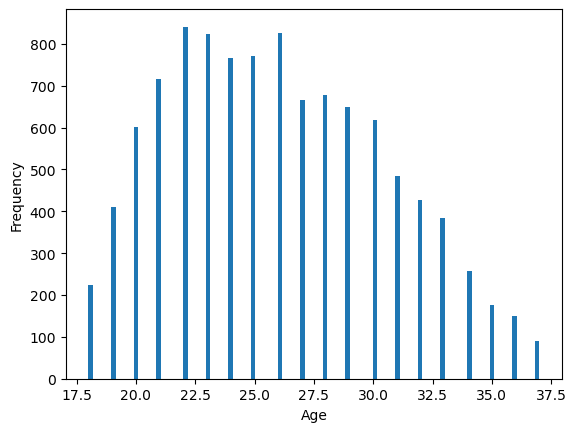

In [11]:
df = df[df['age']>=18]
df = df[df['age']<=37]
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.hist(df['age'], bins=100)
plt.show()


In [12]:
df.drop(['player', 'appearance', 'days_injured'], axis=1, inplace=True)

In [13]:
df.head(2)

,team,name,position,height,age,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,58,1,1500000,22000000,1,0


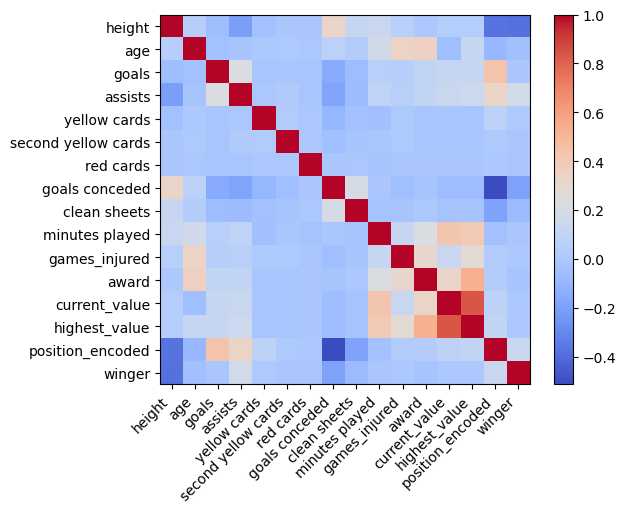

In [14]:
matrix = df.corr(numeric_only=True)
plt.imshow(matrix, cmap='coolwarm')
plt.colorbar()

variables = matrix.columns.tolist()
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)
plt.show()

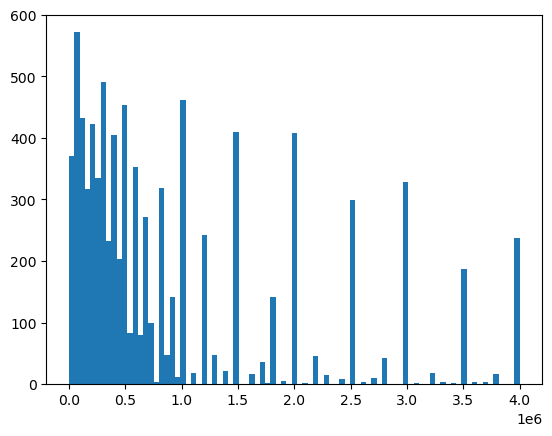

In [15]:
df = df[df['current_value']<=4000000]
plt.hist(df['current_value'], bins= 85)
plt.show()

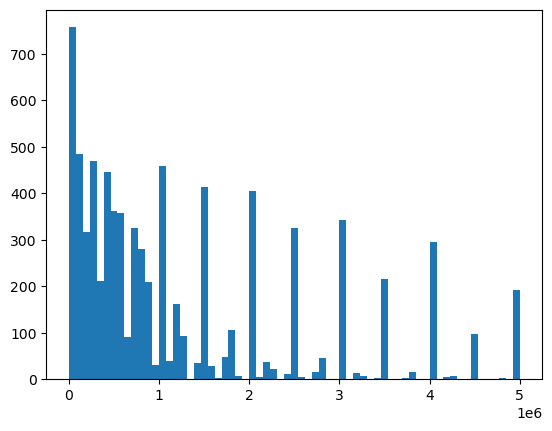

In [16]:
df = df[df['highest_value']<=5000000]
plt.hist(df['highest_value'], bins= 65)
plt.show()

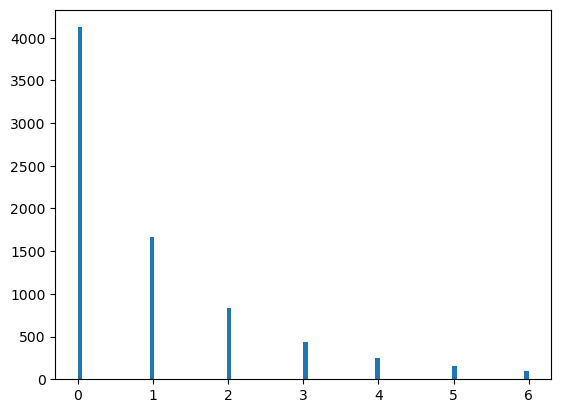

In [17]:
df = df[df['award']<=6]
plt.hist(df['award'], bins=100)
plt.show()

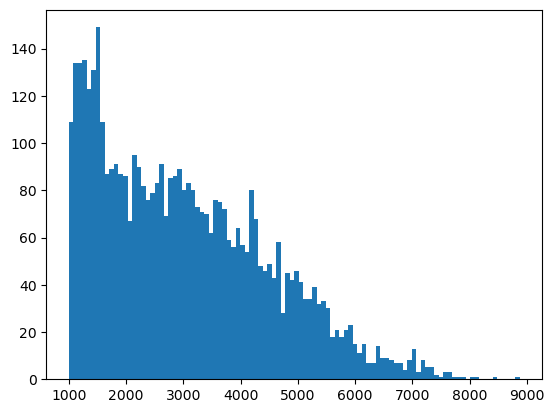

In [18]:
df= df[df['minutes played']>=1000]
plt.hist(df['minutes played'], bins=100)
plt.show()

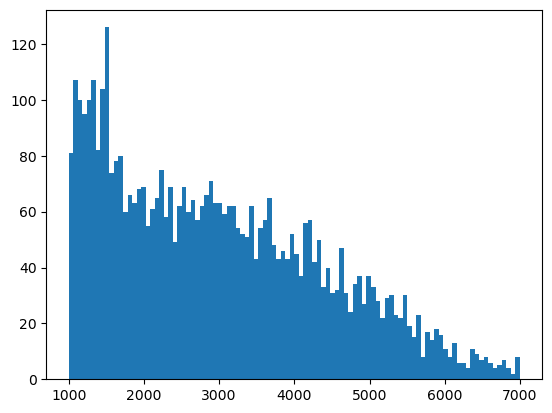

In [19]:
df= df[df['minutes played']<= 7000]
plt.hist(df['minutes played'], bins=100)
plt.show()

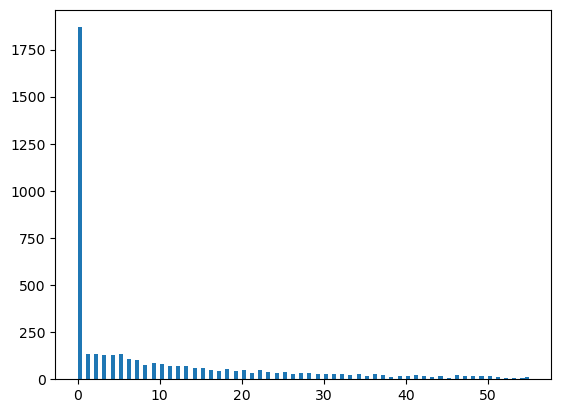

In [20]:
df = df[df['games_injured']<= 55]
plt.hist(df['games_injured'], bins=110)
plt.show()

In [21]:
#plt.hist(df['clean sheets'], bins=110)
#plt.show()

#plt.hist(df['minutes played'], bins=110)
#plt.show()

#plt.hist(df['minutes played'], bins=110)
#plt.show()

In [22]:
df.shape

(4308, 19)

In [23]:
df.drop('clean sheets', axis=1, inplace=True)

In [24]:
df.shape

(4308, 18)

In [25]:
df.columns

Index(['team', 'name', 'position', 'height', 'age', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'minutes played', 'games_injured', 'award', 'current_value',
       'highest_value', 'position_encoded', 'winger'],
      dtype='object')

In [26]:
categorical_features = ['team', 'name', 'position']
numeric_features = ['height', 'age', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'minutes played', 'games_injured', 'award', 'current_value', 'highest_value', 'position_encoded', 'winger']

In [27]:
correlation = df.corr(numeric_only=True)
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.769176
minutes played         0.270912
assists                0.155441
games_injured          0.105626
position_encoded       0.096874
award                  0.087908
goals                  0.074909
yellow cards           0.058163
winger                 0.043564
height                 0.007882
second yellow cards    0.003061
red cards             -0.005415
age                   -0.099704
goals conceded        -0.119946
Name: current_value, dtype: float64


In [28]:
threshold = 0.1
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['assists', 'goals conceded', 'minutes played', 'games_injured',
       'current_value', 'highest_value'],
      dtype='object')

In [29]:
selected_features = ['assists', 'goals conceded', 'minutes played', 'games_injured',
       'current_value', 'highest_value']

In [30]:
df = df[selected_features]
df.head()

,assists,goals conceded,minutes played,games_injured,current_value,highest_value
8,0.000000,0.000000,2758,13,2000000,2000000
20,0.064562,0.000000,2788,0,800000,800000
21,0.102506,0.000000,3512,0,800000,800000
55,0.000000,1.257883,5867,0,2000000,2000000
56,0.000000,1.483871,2790,14,600000,3500000


In [31]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
print(X)

        assists  goals conceded  minutes played  games_injured  highest_value
8      0.000000        0.000000            2758             13        2000000
20     0.064562        0.000000            2788              0         800000
21     0.102506        0.000000            3512              0         800000
55     0.000000        1.257883            5867              0        2000000
56     0.000000        1.483871            2790             14        3500000
...         ...             ...             ...            ...            ...
10747  0.208333        0.000000            2160              0        3000000
10748  0.000000        0.000000            1588              0         200000
10749  0.087977        0.000000            1023              0          75000
10750  0.186335        0.000000            1449             18         300000
10753  0.000000        0.000000            1046              0          25000

[4308 rows x 5 columns]


## Buliding the Model

In [37]:
model = LinearRegression()

In [38]:
ridge_model = Ridge()


In [39]:
lasso_model = Lasso()


In [40]:
param_grid = {
    'alpha': [0, 0.0000003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                            param_grid=param_grid,
                            cv=5,
                            scoring='neg_mean_squared_error', 
                            verbose=1)

## Train the Model

In [41]:

model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [42]:
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [43]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
assists,33581.735308
goals conceded,-28189.091497
minutes played,114913.123881
games_injured,-106567.189300
highest_value,740046.343549


In [44]:
print(model.intercept_) 


1032008.1253627393


## Evaluating the Model 

In [45]:
# Mean Square Error


y_base = [y_train.mean()] * len(y_test)


In [46]:
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')

Mean Squared Error of base model: 8.840536e+11
Mean Squared Error for training: 3.657000e+11
Mean Squared Error for testing: 3.264513e+11


In [47]:
# Mean Absolute Error

mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base:2e}')
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute  Error of base model: 7.387236e+05
Mean Absolute Error for training: 4.024519e+05
Mean Absolute Error for testing: 3.756456e+05


In [48]:
#Root Mean Squared Error
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')


Root Mean Squared  Error of base model: 859.4903052554853
Root Mean Squared Error for training: 604731.3469041142
Root Mean Squared Error for testing: 571359.1633658067


In [49]:
#R Square
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.6140194419710459
R Square for testing: 0.6301346116731132


In [50]:
predictions = model.predict(X_test_scaled)

In [51]:
Real_Values = np.array(y_test)

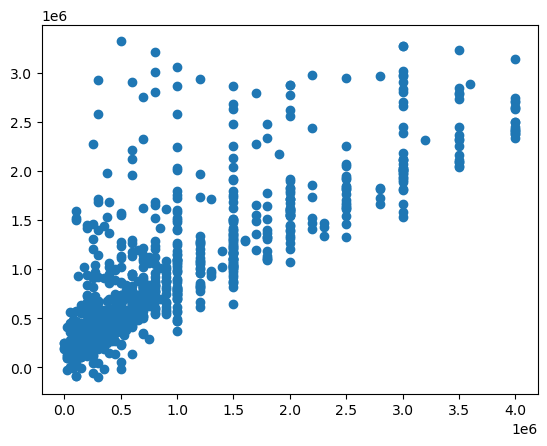

In [53]:
#Real_Values
plt.scatter(Real_Values, predictions)
plt.show()


C:\Users\saalf\AppData\Local\Temp\ipykernel_9156\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


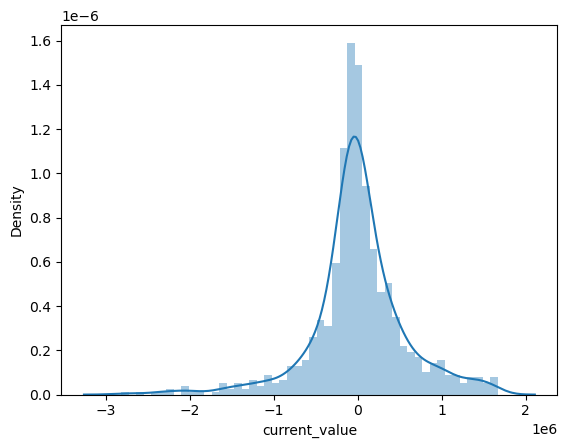

In [56]:
sns.distplot((y_test-predictions),bins=50);